In [14]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.optimizers import RMSprop
import numpy as np
from keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt

In [15]:
batch_size = 128
num_classes = 10
epochs = 20

In [16]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

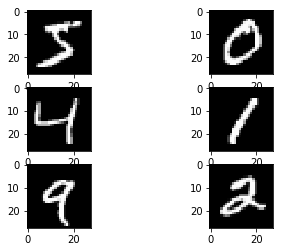

In [17]:
#print the former 6 train images below
import matplotlib.pyplot as plt
plt.subplot(321)
plt.imshow(x_train[0],cmap=plt.get_cmap('gray'))

plt.subplot(322)
plt.imshow(x_train[1],cmap=plt.get_cmap('gray'))

plt.subplot(323)
plt.imshow(x_train[2],cmap=plt.get_cmap('gray'))

plt.subplot(324)
plt.imshow(x_train[3],cmap=plt.get_cmap('gray'))

plt.subplot(325)
plt.imshow(x_train[4],cmap=plt.get_cmap('gray'))

plt.subplot(326)
plt.imshow(x_train[5],cmap=plt.get_cmap('gray'))
plt.show()


In [18]:
if K.image_data_format() == 'channels_first':  ##reshape it so that it is suitable for use training a CNN. 
    #In Keras, the layers used for two-dimensional convolutions expect pixel values with the dimensions [pixels][width][height].
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols).astype('float32')
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols).astype('float32')
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1).astype('float32')
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1).astype('float32')
    input_shape = (img_rows, img_cols, 1)

In [19]:
# In order to speed up the convergence, we may normalize the input values
# so that they are in the range of (0, 1) for (-1, 1)
# Your code here.
X_train =x_train/255.0
X_test =x_test/255.0

In [20]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [21]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

model = Sequential()

In [22]:
# Please build up a simple ConvNets by stacking a few conovlutioanl layers (kenel size with 3x3
# is a good choice, don't foget using non-linear activations for convolutional layers),
# max-pooling layers, dropout layers and dense/fully-connected layers.

# Set the CNN model 
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Out
model.add(Conv2D(64,(3,3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Dropout(0.2))##drop 20% data
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
          

In [23]:
# complete the loss and optimizer
# Hints: use the cross-entropy loss, optimizer could be SGD or Adam, RMSProp, etc.
# Feel free to try different hyper-parameters.
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),  ##use ADAM here
              metrics=['accuracy'])

In [24]:
# Extra Points 1: use data augmentation in the progress of model training.
# Note that data augmentation is a practical technique for reducing overfitting.
# Hints: you may refer to https://keras.io/preprocessing/image/
# Your code here
# x_train = data_augment(...)


In [25]:
# Extra Points 2: use K-Fold cross-validation for ensembling k models,
# i.e. (1) split the whole training data into K folds;
#      (2) train K models based on different training data;
#      (3) when evaludating the testing data, averaging over K model predictions as final output.
# The codes may look like:
#   for i in range(K):
#       x_train, y_train = ...
#       model_i = train(x_train , y_train)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 18s - loss: 0.7138 - acc: 0.8918 - val_loss: 0.0536 - val_acc: 0.9825
Epoch 2/20
60000/60000 [==============================] - 18s - loss: 0.0778 - acc: 0.9755 - val_loss: 0.0404 - val_acc: 0.9869
Epoch 3/20
60000/60000 [==============================] - 18s - loss: 0.0498 - acc: 0.9841 - val_loss: 0.0344 - val_acc: 0.9897
Epoch 4/20
60000/60000 [==============================] - 18s - loss: 0.0381 - acc: 0.9883 - val_loss: 0.0244 - val_acc: 0.9931
Epoch 5/20
60000/60000 [==============================] - 18s - loss: 0.0298 - acc: 0.9903 - val_loss: 0.0375 - val_acc: 0.9883
Epoch 6/20
60000/60000 [==============================] - 18s - loss: 0.0270 - acc: 0.9913 - val_loss: 0.0258 - val_acc: 0.9924
Epoch 7/20
60000/60000 [==============================] - 18s - loss: 0.0219 - acc: 0.9932 - val_loss: 0.0268 - val_acc: 0.9918
Epoch 8/20
60000/60000 [==============================

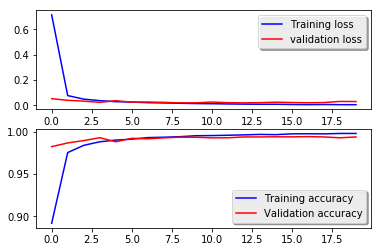

Final test loss: 0.0308242142628
Final test accuracy: 0.994


In [26]:
history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)



fig, ax=plt.subplots(2,1)                    
ax[0].plot(history.history['loss'], color='b', label="Training loss") ##this is how to plot the accuracy and loss in keras
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)
plt.show()

print('Final test loss:', score[0])  # print the final result
print('Final test accuracy:', score[1])